In [4]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
# from qiskit_nature.second_q.mappers import ParityMapper, QubitConverter
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer

from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_algorithms import VQE, AdaptVQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD


In [5]:
coordinates = {}

coordinates[0] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.004121, 1.705009, -0.796791)]
coordinates[1] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.0406, 1.73152, -0.818389)]
coordinates[2] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.077078, 1.758031, -0.839987)]
coordinates[3] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.113557, 1.784542, -0.861585)]
coordinates[4] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.150036, 1.811053, -0.883183)]
coordinates[5] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.186514, 1.837564, -0.904781)]
coordinates[6] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.222993, 1.864075, -0.926379)]
coordinates[7] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.259471, 1.890586, -0.947977)]
coordinates[8] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.29595, 1.917098, -0.969575)]
coordinates[9] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.332429, 1.943609, -0.991173)]
coordinates[10] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.368907, 1.97012, -1.012771)]
coordinates[11] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.405386, 1.996631, -1.034369)]
coordinates[12] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.441864, 2.023142, -1.055967)]
coordinates[13] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.478343, 2.049653, -1.077566)]
coordinates[14] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.514822, 2.076164, -1.099164)]
coordinates[15] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.5513, 2.102675, -1.120762)]
coordinates[16] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.587779, 2.129186, -1.14236)]
coordinates[17] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.624257, 2.155697, -1.163958)]
coordinates[18] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.660736, 2.182208, -1.185556)]
coordinates[19] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.697215, 2.208719, -1.207154)]
coordinates[20] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.733693, 2.23523, -1.228752)]
coordinates[21] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.770172, 2.261741, -1.25035)]
coordinates[22] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.80665, 2.288252, -1.271948)]
coordinates[23] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.843129, 2.314763, -1.293546)]
coordinates[24] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.020682),(0.989529, 0.0, -0.250241),(-0.579536, 1.280832, -0.451222),(-0.824405, 1.82202, 0.378806),(0.879608, 2.341274, -1.315144)]

In [6]:
def calc_VQE(num_electrons, num_spatial_orbitals):
    energies = []
    for i in range(len(coordinates)):
        print(f"========================{i}========================")
        driver = PySCFDriver.from_molecule(
            MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
            coordinates[i],
            charge=0,
            multiplicity=1),
            basis='631g*'
            # basis='631+g**'
        )
        problem = driver.run()
        # print(problem.num_particles)
        # print(problem.num_spatial_orbitals)

        transformer = ActiveSpaceTransformer(num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals)
        transformed_problem = transformer.transform(problem)
        # print(transformed_problem.num_particles)
        # print(transformed_problem.num_spatial_orbitals)

        mapper = JordanWignerMapper()

        ansatz = UCCSD(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            transformed_problem.num_spatial_orbitals,
            transformed_problem.num_particles,
            mapper,
            ),
        )

        vqe_solver = VQE(Estimator(), ansatz, SLSQP())
        adapt_vqe = AdaptVQE(vqe_solver)
        adapt_vqe.initial_point = [0.0] * ansatz.num_parameters

        calc = GroundStateEigensolver(mapper, adapt_vqe)
        res = calc.solve(transformed_problem)
        print(res)
        energies.append(res.total_energies[0])
    
    return energies

In [7]:
energies = calc_VQE(2,2)

========================0========================


/home/azhar04/anaconda3/envs/quantum-dev/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -153.753906862811
  - computed part:      -1.304005780369
  - ActiveSpaceTransformer extracted energy part: -152.449901082442
~ Nuclear repulsion energy (Hartree): 42.645077230806
> Total ground state energy (Hartree): -111.108829632005
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-8.97302246  21.65782419  -7.10488457]
 
  0: 
  * Electronic dipole moment (a.u.): [-9.788179411256  21.262329232899  -6.934886745071]
    - computed part:      [-1.418044548786  1.884003884241  -0.546103881923]
    - ActiveSpaceTransformer extracted energy part: [-8.370134862471  19.378325348659  -6.388782863147]
  > Dipole moment (a.u.): [0.815156951256  0.395494957101  -0.169997824929]  Total: 0.921844008905
                 (debye): [2.071922108574  1.005247816612  -0.432091330802]  Total: 2.343093535255
 
========================1

In [8]:
energies

[-111.10882963200481,
 -111.13818067478945,
 -111.15575108389437,
 -111.1646666798289,
 -111.16724942731183,
 -111.16522962416995,
 -111.15990353302854,
 -111.15225307977754,
 -111.1430378788212,
 -111.13285330778726,
 -111.12215384437872,
 -111.11130210395868,
 -111.10059623051772,
 -111.09027277718722,
 -111.08054999755714,
 -111.07159312933118,
 -111.06351592741227,
 -111.0563745188476,
 -111.05016668318456,
 -111.04484118734726,
 -111.04031117360978,
 -111.03647457544739,
 -111.03322057369138,
 -111.03046879997103,
 -111.02811351995695]

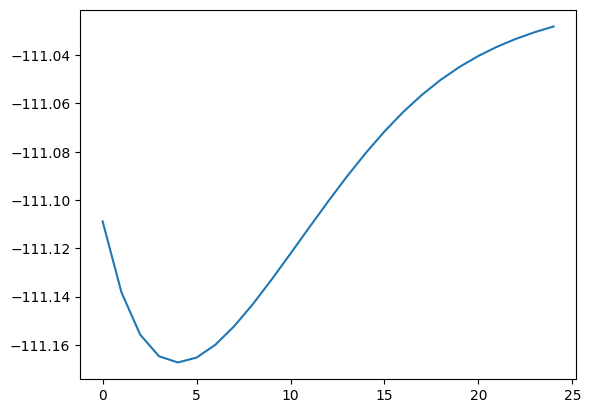

In [9]:
import matplotlib.pyplot as plt
plt.plot(energies)

In [11]:
file_path = f"data/Trans_AdVQE_2_2.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in energies:
        file.write(str(element) + "\n")